## H-DNA: Primate Analysis

In [1]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import tempfile
import subprocess
from tqdm import tqdm
import os
import subprocess
from pathlib import Path
import re

%load_ext autoreload
%autoreload 2

In [149]:
!./bigBedToBed mPanPan1_v2.0.nonB_MR.bb mPanPan1_v2.0.nonB_MR.bed

In [271]:
mirror_path = Path("/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/")

In [273]:
mirror_paths = {file.name.split('_')[0]: file for file in mirror_path.glob("*MR.processed.tsv")}
mirror_paths

{'mGorGor1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mGorGor1_v2.0_MR.processed.tsv'),
 'mPanPan1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPanPan1_v2.0_MR.processed.tsv'),
 'mPanTro3': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPanTro3_v2.0_MR.processed.tsv'),
 'mPonAbe1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPonAbe1_v2.0_MR.processed.tsv'),
 'mPonPyg2': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPonPyg2_v2.0_MR.processed.tsv'),
 'mSymSyn1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mSymSyn1_v2.0_MR.processed.tsv')}

In [16]:
telo_path = Path("/storage/group/izg5139/default/external/satellites/primates/telomeres")
gff_path = Path("/storage/group/izg5139/default/external/satellites/primates/gff")
centro_path = Path("/storage/group/izg5139/default/external/satellites/primates/centromeres")

mirror_path = Path("/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/")
inverted_path = Path("/storage/group/izg5139/default/external/quadrupia_database/g4/nonBDNA/extraction/nonbdna_primates/processed/IR")
compartment = "gene"

extract_species = lambda file: file.name.split('.')[0]
extract_species_ = lambda file: extract_species(file) if file.name.startswith("chm") else extract_species(file) + "_v2"

mirror_paths = {file.name.split('_')[0]: file for file in mirror_path.glob("*MR.processed.tsv")}
inverted_paths = {extract_species_(file): file for file in inverted_path.glob("*.csv")}
gff_paths = {file.name.replace("-", "_").split("_")[3].split(".")[0]: file for file in gff_path.glob("*.gff.gz")}

gff_paths = {species + "_v2" if not species.startswith("CHM") else "chm13v2": file for species, file in gff_paths.items()}
centro_paths = {extract_species(file): file for file in centro_path.glob("*.bed") if "bb" not in file.name and "censat" in file.name.lower()}
telo_paths = {extract_species(file): file for file in telo_path.glob("*.bed")}

mirror_paths

{'mGorGor1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mGorGor1_v2.0_MR.processed.tsv'),
 'mPanPan1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPanPan1_v2.0_MR.processed.tsv'),
 'mPanTro3': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPanTro3_v2.0_MR.processed.tsv'),
 'mPonAbe1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPonAbe1_v2.0_MR.processed.tsv'),
 'mPonPyg2': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPonPyg2_v2.0_MR.processed.tsv'),
 'mSymSyn1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mSymSyn1_v2.0_MR.processed.tsv')}

In [274]:
genes = {file.name.split('_')[0]: file for file in Path("/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features").glob("*.bed") if "Gene" in file.name}
genome_features = {file.name.split('_')[0]: file for file in Path("/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features").glob("*.bed") if "GenomeFeature" in file.name}
censat = {file.name.split('_')[0]: file for file in Path("/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features").glob("*.bed") if "CenSat" in file.name}
genes

{'mGorGor1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features/mGorGor1_refGene.bed'),
 'mPanPan1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features/mPanPan1_refGene.bed'),
 'mPanTro3': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features/mPanTro3_refGene.bed'),
 'mPonAbe1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features/mPonAbe1_refGene.bed'),
 'mPonPyg2': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features/mPonPyg2_refGene.bed'),
 'mSymSyn1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primate_features/features/mSymSyn1_refGene.bed')}

In [275]:
fasta_paths = {file.name.split('_')[0]: file for file in Path("/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta").glob("*.fna")}
fasta_paths

{'mGorGor1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mGorGor1_v2.0.fna'),
 'mPanPan1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPanPan1_v2.0.fna'),
 'mPanTro3': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPanTro3_v2.0.fna'),
 'mPonAbe1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPonAbe1_v2.0.fna'),
 'mPonPyg2': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPonPyg2_v2.0.fna'),
 'mSymSyn1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mSymSyn1_v2.0.fna')}

In [276]:
stat = fasta_paths['mPanPan1']
stat

PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPanPan1_v2.0.fna')

In [98]:
def parse_fasta(fasta):
    for seq in SeqIO.parse(fasta, 'fasta'):
        yield str(seq.id), seq.seq.lower()

In [107]:
from Bio import SeqIO
flag = False
for seqID, seq in parse_fasta(stat):
    temp = df[df['seqID'] == seqID]
    for _, row in temp.iterrows():
        start = row['start']
        end = row['end']
        sequence = seq[start: end]
        if 30 < len(sequence) < 40:
            flag = True
            break
    if flag:
        break

In [277]:
mirror_table = pd.read_table(mirror_paths['mPanPan1'])

def get_hdna_table(mirror_table):
    mirror_table.loc[:, "at"] = mirror_table["sequence"].str.count("a|t").div(mirror_table["sequenceLength"])
    mirror_table.loc[:, "ag"] = mirror_table["sequence"].str.count("a|g").div(mirror_table["sequenceLength"])
    mirror_table.loc[:, "ct"] = mirror_table["sequence"].str.count("c|t").div(mirror_table["sequenceLength"])
    hdna_df = mirror_table[(mirror_table["at"] < 0.8) & ((mirror_table["ag"] >= 0.9) | (mirror_table["ct"] >= 0.9))]
    return hdna_df
    
hdna_df =  get_hdna_table(mirror_table)
hdna_df.head()

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ag,ct
11,chr1_pat_hsa1,31627,31650,aagaagaagaa,g,aagaagaagaagaagaagaagaa,11,1,23,8,3,0,0,8A/0C/3G/0T,0.695652,1.000000,0.000000
13,chr1_pat_hsa1,55986,56037,ccctctcccctctcccctctcccct,c,ccctctcccctctcccctctcccctctcccctctcccctctcccct...,25,1,51,0,0,18,7,0A/18C/0G/7T,0.274510,0.000000,1.000000
14,chr1_pat_hsa1,55990,56040,ctcccctctcccctctcccctctcc,.,ctcccctctcccctctcccctctcccctctcccctctcccctctcc...,25,0,50,0,0,18,7,0A/18C/0G/7T,0.280000,0.000000,1.000000
15,chr1_pat_hsa1,56003,56067,tctcccctctcccctctcccctctcccctc,tccc,tctcccctctcccctctcccctctcccctctcccctcccctctccc...,30,4,64,0,0,21,9,0A/21C/0G/9T,0.296875,0.000000,1.000000
19,chr1_pat_hsa1,79144,79197,acagagagggagagggagagaca,aagaggg,acagagagggagagggagagacaaagagggacagagagggagaggg...,23,7,53,10,11,2,0,10A/2C/11G/0T,0.433962,0.924528,0.075472


In [20]:
from pybedtools import BedTool

hdna_bed = BedTool.from_dataframe(hdna_df[["seqID", "start", "end"]])\
                  .sort()
hdna_bed

<BedTool(/tmp/pybedtools.wa8trhyu.tmp)>

### Load Genic


In [278]:
gene_primates = {}
for species in censat:
    print(species)
    gene_df = pd.read_table(genes[species], 
                               header=None, 
                               usecols=range(3), 
                               names=["seqID", "start", "end"]
                              )
    gene_df.loc[:, "compartment"] = "Gene"
    gene_primates.update({species: gene_df})

mGorGor1
mPanPan1
mPanTro3
mPonAbe1
mPonPyg2
mSymSyn1


### Load Centromeric & Per


In [164]:
centro = {}
for species in censat:
    centro_df = pd.read_table(censat[species], 
                                       header=None, 
                                       usecols=range(4), 
                                       names=["seqID", "start", "end", "compartment"]
                                      )\
                            .query("compartment != 'GAP'")
    centro_df.loc[:, "length"] = centro_df["end"] - centro_df["start"]
    centro_df["compartment"] = centro_df["compartment"].apply(lambda x: x.split("(")[0])\
                                    .replace("HSat1A", "hsat1A")\
                                    .replace("HSat1B", "hsat1B")\
                                    .replace("HSat2", "hsat2")\
                                    .replace("HSat3", "hsat3")\
                                    .replace("HSat2_3", "hsat2_3")\
                                    .replace("cenSat", "censat")\
                                    .replace("bSat", "bsat")\
                                    .replace("gSat", "gsat")
    centro.update({species: centro_df})

#### Load Chromosomes

In [279]:
chromosome_sizes = pd.read_table("/storage/group/izg5139/default/nicole/transfer_mirror/genome_chromosome_sizes_primates.txt")
chromosome_sizes["organism"] = chromosome_sizes["organism"].apply(lambda x: x.split("_")[0])
chromosome_sizes

,organism,seqID,length
0,mGorGor1,chr1_pat_hsa1,243847345
1,mGorGor1,chr2_pat_hsa3,215253457
2,mGorGor1,chr3_pat_hsa4,215373162
3,mGorGor1,chr4_pat_hsa17x5,195332687
4,mGorGor1,chr5_mat_hsa6,199452338
...,...,...,...
578,mSymSyn1,chr23_hap2,71145118
579,mSymSyn1,chr24_hap2,75552088
580,mSymSyn1,MT,16515
581,mSymSyn1,rDNA_morphconsensus0_coverage,266928


In [280]:
primates = {'mGorGor1': 'Gorilla gorilla',
         'mPanTro3': 'Pan troglodytes',
         'mPonPyg2': 'Pongo Pygmaeus',
         'mSymSyn1': 'Symphalangus syndactylus',
         'mPonAbe1': 'Pongo abelii',
         'mPanPan1': 'Pan paniscus'}
primates

{'mGorGor1': 'Gorilla gorilla',
 'mPanTro3': 'Pan troglodytes',
 'mPonPyg2': 'Pongo Pygmaeus',
 'mSymSyn1': 'Symphalangus syndactylus',
 'mPonAbe1': 'Pongo abelii',
 'mPanPan1': 'Pan paniscus'}

In [281]:
species_size = {}
for species in primates:
    sizes = chromosome_sizes.query(f"organism == '{species}'")\
                            .copy()\
                            .drop(columns=['organism'])
    sizes["start"] = 0
    sizes["end"] = sizes["length"]
    sizes["compartment"] = "Genome"
    sizes = sizes[["start", "end", "compartment"]]
    species_size.update({species: sizes})
    
species_size["mGorGor1"]

,start,end,compartment
0,0,243847345,Genome
1,0,215253457,Genome
2,0,215373162,Genome
3,0,195332687,Genome
4,0,199452338,Genome
...,...,...,...
246,0,87483,Genome
247,0,132506,Genome
248,0,93020,Genome
249,0,16407,Genome


#### Load Mirror Repeats

In [282]:
def get_hdna_table(mirror_table):
    mirror_table["sequence"] = mirror_table["sequence"].str.lower()
    mirror_table.loc[:, "at"] = mirror_table["sequence"].str.count("a|t").div(mirror_table["sequenceLength"])
    mirror_table.loc[:, "ag"] = mirror_table["sequence"].str.count("a|g").div(mirror_table["sequenceLength"])
    mirror_table.loc[:, "ct"] = mirror_table["sequence"].str.count("c|t").div(mirror_table["sequenceLength"])
    hdna_df = mirror_table[(mirror_table["at"] < 0.8) & ((mirror_table["ag"] >= 0.9) | (mirror_table["ct"] >= 0.9))]
    return hdna_df

In [283]:
hdna_primates = {}
for species in tqdm(mirror_paths):
    if species not in censat: continue
    mirror_table = pd.read_table(mirror_paths[species])
    hdna_df =  get_hdna_table(mirror_table)
    hdna_primates.update({species: hdna_df})
hdna_df

100%|██████████| 6/6 [01:44<00:00, 17.43s/it]


,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ag,ct
150,chr1_hap1,2169462,2169487,tctctctctc,tctcg,tctctctctctctcgctctctctct,10,5,25,0,0,5,5,0A/5C/0G/5T,0.480000,0.040000,0.960000
151,chr1_hap1,2169463,2169488,ctctctctctc,tcg,ctctctctctctcgctctctctctc,11,3,25,0,0,6,5,0A/6C/0G/5T,0.440000,0.040000,0.960000
211,chr1_hap1,2432885,2432910,gagagagagag,cga,gagagagagagcgagagagagagag,11,3,25,5,6,0,0,5A/0C/6G/0T,0.440000,0.960000,0.040000
212,chr1_hap1,2432886,2432911,agagagagag,cgaga,agagagagagcgagagagagagaga,10,5,25,5,5,0,0,5A/0C/5G/0T,0.480000,0.960000,0.040000
228,chr1_hap1,3161338,3161359,ctctctctct,c,ctctctctctctctctctctc,10,1,21,0,0,5,5,0A/5C/0G/5T,0.476190,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293513,rDNA_morphconsensus0_coverage,264567,264592,gtctctctctct,c,gtctctctctctctctctctctctg,12,1,25,0,1,5,6,0A/5C/1G/6T,0.480000,0.080000,0.920000
2293518,rDNA_morphconsensus0_coverage,266074,266097,ccctccctccc,t,ccctccctccctccctccctccc,11,1,23,0,0,9,2,0A/9C/0G/2T,0.217391,0.000000,1.000000
2293519,rDNA_morphconsensus0_coverage,266075,266100,cctccctccctc,c,cctccctccctccctccctccctcc,12,1,25,0,0,9,3,0A/9C/0G/3T,0.240000,0.000000,1.000000
2293521,chrEBV,3370,3397,ccttcctctcc,cctgg,ccttcctctcccctggcctctccttcc,11,5,27,0,0,7,4,0A/7C/0G/4T,0.333333,0.074074,0.925926


In [284]:
species_size = {}
for species in primates:
    sizes = chromosome_sizes.query(f"organism == '{species}'")\
                            .copy()\
                            .drop(columns=['organism'])
    sizes["start"] = 0
    sizes["end"] = sizes["length"]
    sizes["compartment"] = "Genome"
    sizes = sizes[["start", "end", "length", "compartment"]]
    species_size.update({species: sizes['length'].sum()})
    
species_size["mGorGor1"]

6906811518

In [285]:
hdna_genome_density = {}
for species in tqdm(mirror_paths):
    hdna_table = pd.read_table(
        BedTool.from_dataframe(hdna_primates[species]).sort().merge().fn,
        header=None,
        names=["seqID", "start", "end"]
    )
    hdna_table.loc[:, "length"] = hdna_table["end"] - hdna_table["start"]
    hdna_genome_density.update({species: 1e2 * hdna_table["length"].sum() / species_size[species]})

100%|██████████| 6/6 [00:22<00:00,  3.83s/it]


In [286]:
hdna_genome_density

{'mGorGor1': 0.11856569386117133,
 'mPanPan1': 0.12650212894180934,
 'mPanTro3': 0.12833191111022133,
 'mPonAbe1': 0.13099471456906356,
 'mPonPyg2': 0.13083932373923257,
 'mSymSyn1': 0.14082303861304515}

In [287]:
mirror_primates = {}
for species in tqdm(mirror_paths):
    if species not in censat: continue
    mirror_table = pd.read_table(mirror_paths[species])
    mirror_primates.update({species: mirror_table})
mirror_primates[species]

100%|██████████| 6/6 [00:18<00:00,  3.13s/it]


,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition
0,chr1_hap1,32431,32455,aaaataaaataa,.,aaaataaaataaaataaaataaaa,12,0,24,10,0,0,2,10A/0C/0G/2T
1,chr1_hap1,32435,32456,taaaataaaa,t,taaaataaaataaaataaaat,10,1,21,8,0,0,2,8A/0C/0G/2T
2,chr1_hap1,35233,35262,ttttttgtttgttt,g,ttttttgtttgtttgtttgtttgtttttt,14,1,29,0,2,0,12,0A/0C/2G/12T
3,chr1_hap1,37940,37966,tctatctatc,tattta,tctatctatctatttactatctatct,10,6,26,2,0,3,5,2A/3C/0G/5T
4,chr1_hap1,51351,51382,aaaaacaaaacaaaa,c,aaaaacaaaacaaaacaaaacaaaacaaaaa,15,1,31,13,0,2,0,13A/2C/0G/0T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293532,chrEBV,38447,38472,gccggggccg,cggag,gccggggccgcggaggccggggccg,10,5,25,0,6,4,0,0A/4C/6G/0T
2293533,chrEBV,38462,38487,gccggggccg,cggag,gccggggccgcggaggccggggccg,10,5,25,0,6,4,0,0A/4C/6G/0T
2293534,chrEBV,38477,38502,gccggggccg,cagag,gccggggccgcagaggccggggccg,10,5,25,0,6,4,0,0A/4C/6G/0T
2293535,chrEBV,38492,38517,gccggggccg,cagag,gccggggccgcagaggccggggccg,10,5,25,0,6,4,0,0A/4C/6G/0T


### Total Number of Mirror Repeats

In [288]:
from collections import defaultdict

stat_primates = defaultdict(list)
for species in tqdm(mirror_primates):
    mirror_df = mirror_primates[species]
    hdna_df = hdna_primates[species]
    stat_primates["species"].append(primates[species])
    stat_primates["mirror"].append(mirror_df.shape[0])
    stat_primates["hdna"].append(hdna_df.shape[0])
    
stat_primates = pd.DataFrame(stat_primates).sort_values(by=['hdna'], ascending=False)
stat_primates

100%|██████████| 6/6 [00:00<00:00, 35544.95it/s]


,species,mirror,hdna
5,Symphalangus syndactylus,2293537,418878
3,Pongo abelii,2363233,401813
4,Pongo Pygmaeus,2353825,401038
0,Gorilla gorilla,2373160,393373
2,Pan troglodytes,2304403,391106
1,Pan paniscus,2287356,389259


In [289]:
stat_primates = pd.DataFrame(stat_primates).sort_values(by=['mirror'], ascending=False)
stat_primates

,species,mirror,hdna
0,Gorilla gorilla,2373160,393373
3,Pongo abelii,2363233,401813
4,Pongo Pygmaeus,2353825,401038
2,Pan troglodytes,2304403,391106
5,Symphalangus syndactylus,2293537,418878
1,Pan paniscus,2287356,389259


In [290]:
stat_primates.describe(exclude=object)

,mirror,hdna
count,6.000000e+00,6.000000
mean,2.329252e+06,399244.500000
std,3.830081e+04,10915.200974
min,2.287356e+06,389259.000000
25%,2.296254e+06,391672.750000
50%,2.329114e+06,397205.500000
75%,2.360881e+06,401619.250000
max,2.373160e+06,418878.000000


In [291]:
stat_primates['mirror'].median()

2329114.0

In [292]:
stat_primates['hdna'].median()

397205.5

In [294]:
fasta_paths = {file.name.split('_')[0]: file for file in Path("/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta").glob("*.fna")}
fasta_paths

{'mGorGor1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mGorGor1_v2.0.fna'),
 'mPanPan1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPanPan1_v2.0.fna'),
 'mPanTro3': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPanTro3_v2.0.fna'),
 'mPonAbe1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPonAbe1_v2.0.fna'),
 'mPonPyg2': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mPonPyg2_v2.0.fna'),
 'mSymSyn1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/primates_new/fasta/mSymSyn1_v2.0.fna')}

In [295]:
mirror_paths

{'mGorGor1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mGorGor1_v2.0_MR.processed.tsv'),
 'mPanPan1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPanPan1_v2.0_MR.processed.tsv'),
 'mPanTro3': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPanTro3_v2.0_MR.processed.tsv'),
 'mPonAbe1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPonAbe1_v2.0_MR.processed.tsv'),
 'mPonPyg2': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mPonPyg2_v2.0_MR.processed.tsv'),
 'mSymSyn1': PosixPath('/storage/group/izg5139/default/nicole/transfer_mirror/mirrors_t2t_primates/mSymSyn1_v2.0_MR.processed.tsv')}

In [184]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
def parse_fasta(fasta):
    file = open(fasta, 'r')
    for record in SimpleFastaParser(file):
        yield record[0].split(' ')[0], record[1].lower()
        
for species in tqdm(mirror_paths, leave=True, position=0):
    fasta = fasta_paths[species]
    mirror_df = hdna_primates[species]
    for seqID, seq in parse_fasta(str(fasta)):
        temp = mirror_df[mirror_df['seqID'] == seqID]
        total_checked = 0
        total = temp.shape[0]
        for _, row in tqdm(temp.iterrows(), leave=True, position=0, total=total):
            start = int(row['start'])
            end = int(row['end'])
            sequence = row['sequence']
            arm = row['sequenceOfArm']
            spacer = row['sequenceOfSpacer']
            length = int(row['sequenceLength'])
            if spacer == '.':
                spacer = ''
            assert seq[start: end] == sequence == arm + spacer + arm[::-1]
            assert len(sequence) == length
            total_checked += 1
        assert total_checked == total

  0%|          | 0/6 [02:13<?, ?it/s]

KeyboardInterrupt



In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

mirror_color = sns.color_palette("Set3")[2]
hdna_color = sns.color_palette("Set2")[2]

In [297]:
hdna_primates['mGorGor1'].head()

,seqID,start,end,sequenceOfArm,sequenceOfSpacer,sequence,armLength,spacerLength,sequenceLength,arm_a,arm_g,arm_c,arm_t,composition,at,ag,ct
25,chr1_pat_hsa1,431304,431335,ctctctctctctctc,t,ctctctctctctctctctctctctctctctc,15,1,31,0,0,8,7,0A/8C/0G/7T,0.483871,0.0,1.0
26,chr1_pat_hsa1,431305,431336,tctctctctctctct,c,tctctctctctctctctctctctctctctct,15,1,31,0,0,7,8,0A/7C/0G/8T,0.516129,0.0,1.0
47,chr1_pat_hsa1,652764,652795,ctctctctctctctc,t,ctctctctctctctctctctctctctctctc,15,1,31,0,0,8,7,0A/8C/0G/7T,0.483871,0.0,1.0
48,chr1_pat_hsa1,652765,652796,tctctctctctctct,c,tctctctctctctctctctctctctctctct,15,1,31,0,0,7,8,0A/7C/0G/8T,0.516129,0.0,1.0
84,chr1_pat_hsa1,1652457,1652480,ctctctctctc,t,ctctctctctctctctctctctc,11,1,23,0,0,6,5,0A/6C/0G/5T,0.478261,0.0,1.0


In [298]:
len(set(centro['mGorGor1']['seqID']))

141

In [299]:
len(set(hdna_primates['mGorGor1']['seqID']))

53

In [301]:
primates = {
         'mGorGor1': 'Gorilla gorilla',
         'mPanTro3': 'Pan troglodytes',
         'mPonPyg2': 'Pongo Pygmaeus',
         'mSymSyn1': 'Symphalangus syndactylus',
         'mPonAbe1': 'Pongo abelii',
         'mPanPan1': 'Pan paniscus'
}
primates

{'mGorGor1': 'Gorilla gorilla',
 'mPanTro3': 'Pan troglodytes',
 'mPonPyg2': 'Pongo Pygmaeus',
 'mSymSyn1': 'Symphalangus syndactylus',
 'mPonAbe1': 'Pongo abelii',
 'mPanPan1': 'Pan paniscus'}

In [307]:
hdna_genome_density

{'mGorGor1': 0.11856569386117133,
 'mPanPan1': 0.12650212894180934,
 'mPanTro3': 0.12833191111022133,
 'mPonAbe1': 0.13099471456906356,
 'mPonPyg2': 0.13083932373923257,
 'mSymSyn1': 0.14082303861304515}

(393373, 17)


***** WARNING: File /tmp/pybedtools.576yi96k.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage8955	4561	4590	gagacagagagaga	g	gagacagagagagagagagagagacagag	14	1	29	7	6	1	0	7A/1C/6G/0T	0.4827586206896552	0.9310344827586207	0.06896551724137931

***** WARNING: File /tmp/pybedtools.576yi96k.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage8955	4561	4590	gagacagagagaga	g	gagacagagagagagagagagagacagag	14	1	29	7	6	1	0	7A/1C/6G/0T	0.4827586206896552	0.9310344827586207	0.06896551724137931



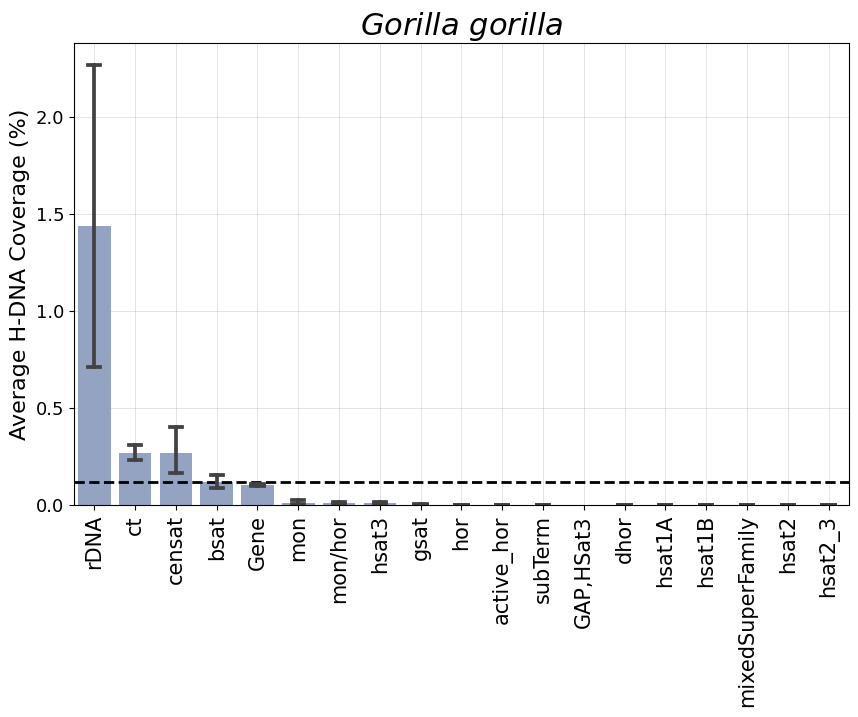

(389259, 17)


***** WARNING: File /tmp/pybedtools.0_4e6tav.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	1536	1559	aagaagaagaa	g	aagaagaagaagaagaagaagaa	11	1	23	8	3	0	0	8A/0C/3G/0T	0.6956521739130435	1.0	0.0

***** WARNING: File /tmp/pybedtools.0_4e6tav.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	1536	1559	aagaagaagaa	g	aagaagaagaagaagaagaagaa	11	1	23	8	3	0	0	8A/0C/3G/0T	0.6956521739130435	1.0	0.0



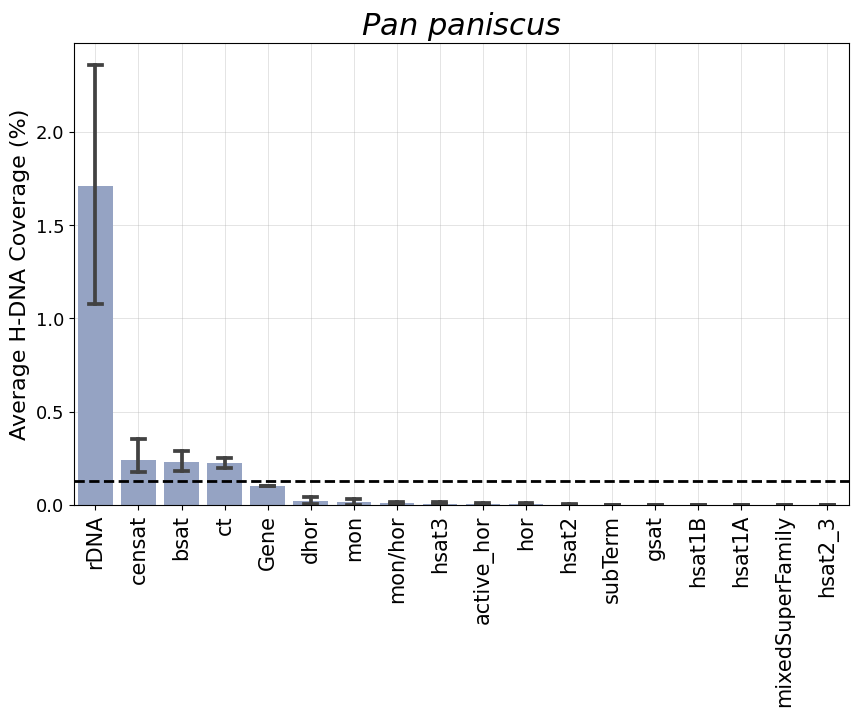

(391106, 17)


***** WARNING: File /tmp/pybedtools.p088dkew.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	1808	1831	aagaagaagaa	g	aagaagaagaagaagaagaagaa	11	1	23	8	3	0	0	8A/0C/3G/0T	0.6956521739130435	1.0	0.0

***** WARNING: File /tmp/pybedtools.p088dkew.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	1808	1831	aagaagaagaa	g	aagaagaagaagaagaagaagaa	11	1	23	8	3	0	0	8A/0C/3G/0T	0.6956521739130435	1.0	0.0



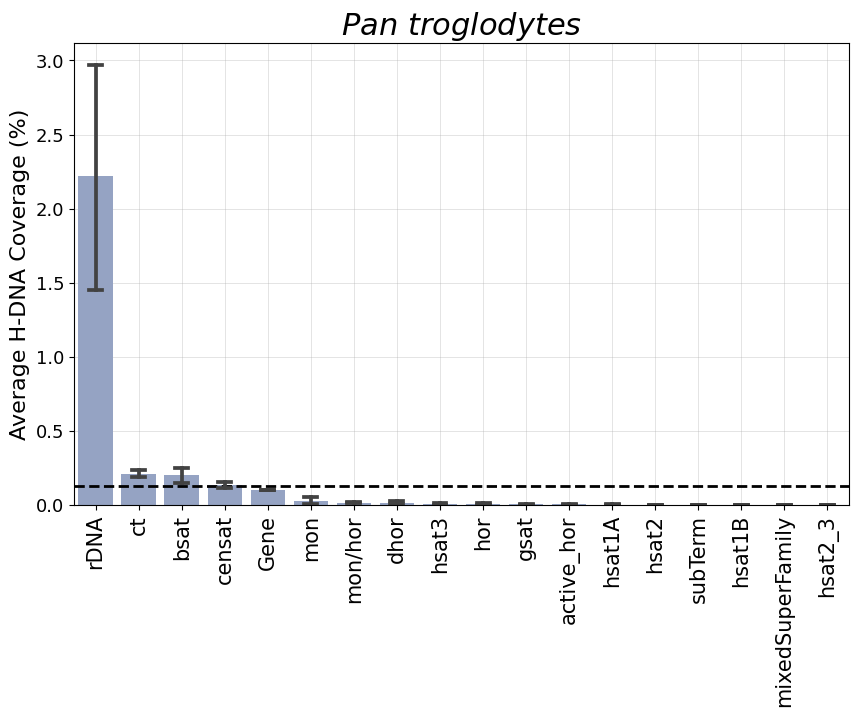

(401813, 17)


***** WARNING: File /tmp/pybedtools.7wupqcpe.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	7086	7108	cgccccccccc	.	cgccccccccccccccccccgc	11	0	22	0	1	10	0	0A/10C/1G/0T	0.0	0.09090909090909091	0.9090909090909091

***** WARNING: File /tmp/pybedtools.7wupqcpe.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	7086	7108	cgccccccccc	.	cgccccccccccccccccccgc	11	0	22	0	1	10	0	0A/10C/1G/0T	0.0	0.09090909090909091	0.9090909090909091



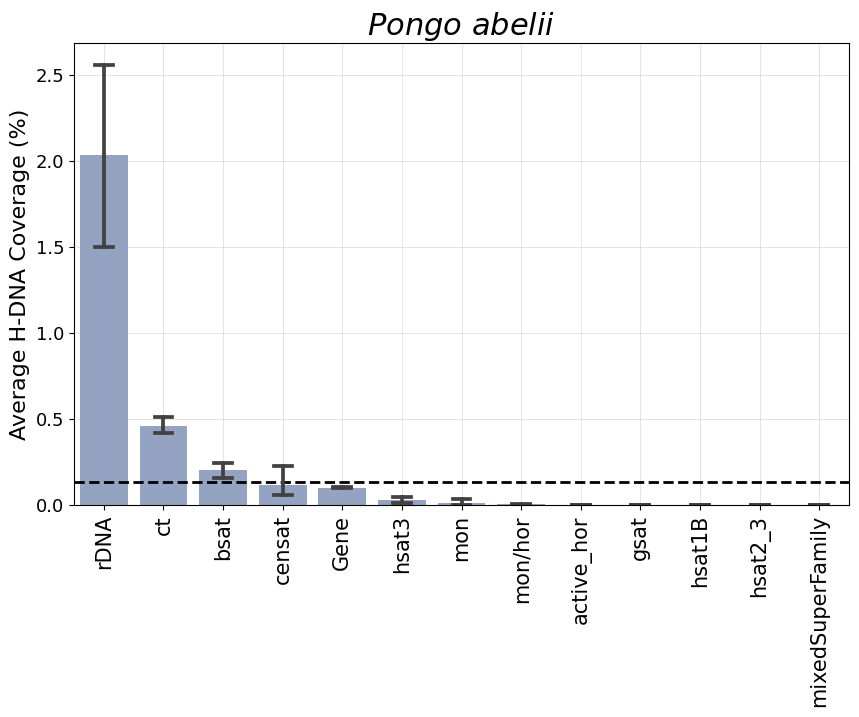

(401038, 17)


***** WARNING: File /tmp/pybedtools.ng04s0_m.tmp has inconsistent naming convention for record:
chr10_hap1_hsa12	17553	17574	ttctctgtct	c	ttctctgtctctctgtctctt	10	1	21	0	1	3	6	0A/3C/1G/6T	0.5714285714285714	0.09523809523809523	0.9047619047619048

***** WARNING: File /tmp/pybedtools.ng04s0_m.tmp has inconsistent naming convention for record:
chr10_hap1_hsa12	17553	17574	ttctctgtct	c	ttctctgtctctctgtctctt	10	1	21	0	1	3	6	0A/3C/1G/6T	0.5714285714285714	0.09523809523809523	0.9047619047619048



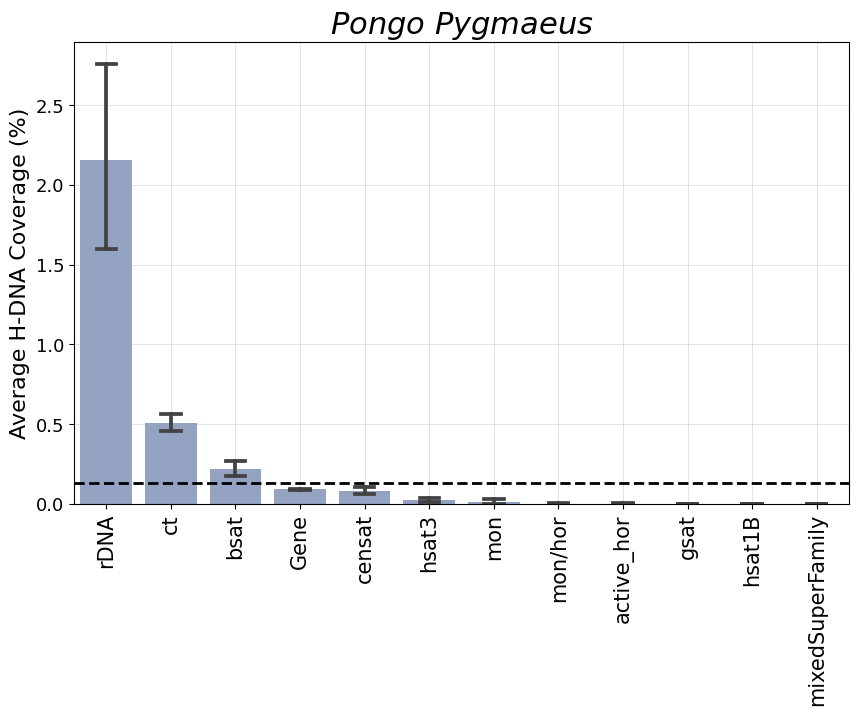

(418878, 17)


***** WARNING: File /tmp/pybedtools.a6ocyh7z.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	47	76	tctgtctctct	ctttctt	tctgtctctctctttctttctctctgtct	11	7	29	0	1	4	6	0A/4C/1G/6T	0.5862068965517241	0.06896551724137931	0.9310344827586207

***** WARNING: File /tmp/pybedtools.a6ocyh7z.tmp has inconsistent naming convention for record:
rDNA_morphconsensus0_coverage	47	76	tctgtctctct	ctttctt	tctgtctctctctttctttctctctgtct	11	7	29	0	1	4	6	0A/4C/1G/6T	0.5862068965517241	0.06896551724137931	0.9310344827586207



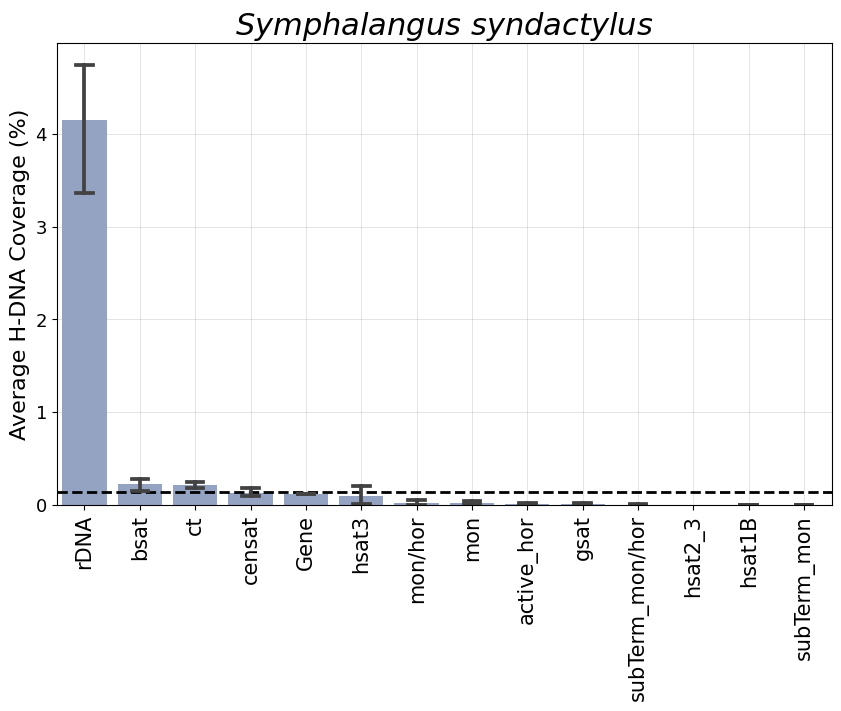

In [308]:
from pybedtools import BedTool

for species in hdna_primates:
    hdna_df = hdna_primates[species]
    centro_df = centro[species]
    gene_df = gene_primates[species]
    
    centro_df = pd.concat([centro_df, 
                           gene_df, 
                           ])

    hdna_bed = BedTool.from_dataframe(hdna_df).sort()
    centro_bed = BedTool.from_dataframe(centro_df).sort()
    
    
    df_coverage_hdna = pd.read_table(
                centro_bed.coverage(hdna_bed).fn,
                header=None,
                names=centro_df.columns.tolist() + ["totalHits", "overlappingBp", "compartmentLength", "coverage"])
    df_coverage_hdna["coverage"] = 1e2 * df_coverage_hdna["coverage"]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.axhline(hdna_genome_density[species], linestyle='--', color='black', lw=2.0, label='Genome Average')
    sns.barplot(
                data=df_coverage_hdna,
                capsize=.3, 
                y="coverage", 
                x="compartment",
                ax=ax,
                errorbar=("ci", 95),
                color=hdna_color,
                order=df_coverage_hdna.groupby("compartment")\
                                 .agg({"coverage": "mean"})\
                                 .sort_values(by=['coverage'], ascending=False)\
                                 .index\
                                 .tolist()
    )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_axisbelow(True)
    ax.tick_params(axis="both", labelsize=13)
    ax.tick_params(axis="x", rotation=90, labelsize=15)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.set_ylabel("Average H-DNA Coverage (%)")
    ax.set_xlabel("")
    primate = primates[species].split(' ')
    ax.set_title(r"$\it{%s}$" % primate[0] + " " + r"$\it{%s}$" % primate[1])
    ax.title.set_size(22)
    plt.show()
    plt.close()
    figures = Path("/storage/group/izg5139/default/nicole/MirrorRTR/figures_hdna_rtr/")
    fig.savefig(figures.joinpath(f"{primate}_average_hdna_density_per_new_compartment.png"), bbox_inches='tight')

In [54]:
primates = {'mGorGor1': 'G. gorilla',
             'mPanTro3': 'P. troglodytes',
             'mPonPyg2': 'P. pygmaeus',
             'mSymSyn1': 'S. syndactylus',
             'mPonAbe1': 'P. abelii',
             'mPanPan1': 'P. paniscus'
}

In [100]:
hdna_df_all = pd.concat([(1e2 * hdna_primates[species].spacerLength\
                                              .value_counts(normalize=True))\
                                              .reset_index()\
                                              .rename(columns={"spacerLength": "Spacer Length", 
                                                               "proportion": "Percentage (%)"})\
                                              .assign(species=primates[species]) for species in hdna_primates]).reset_index(drop=True)
hdna_df_all

,Spacer Length,Percentage (%),species
0,1,38.020149,G. gorilla
1,0,18.062246,G. gorilla
2,7,9.689531,G. gorilla
3,3,9.237797,G. gorilla
4,6,6.576710,G. gorilla
5,2,6.319956,G. gorilla
6,5,6.214458,G. gorilla
7,4,5.879153,G. gorilla
8,1,36.754449,P. paniscus
9,0,19.137644,P. paniscus


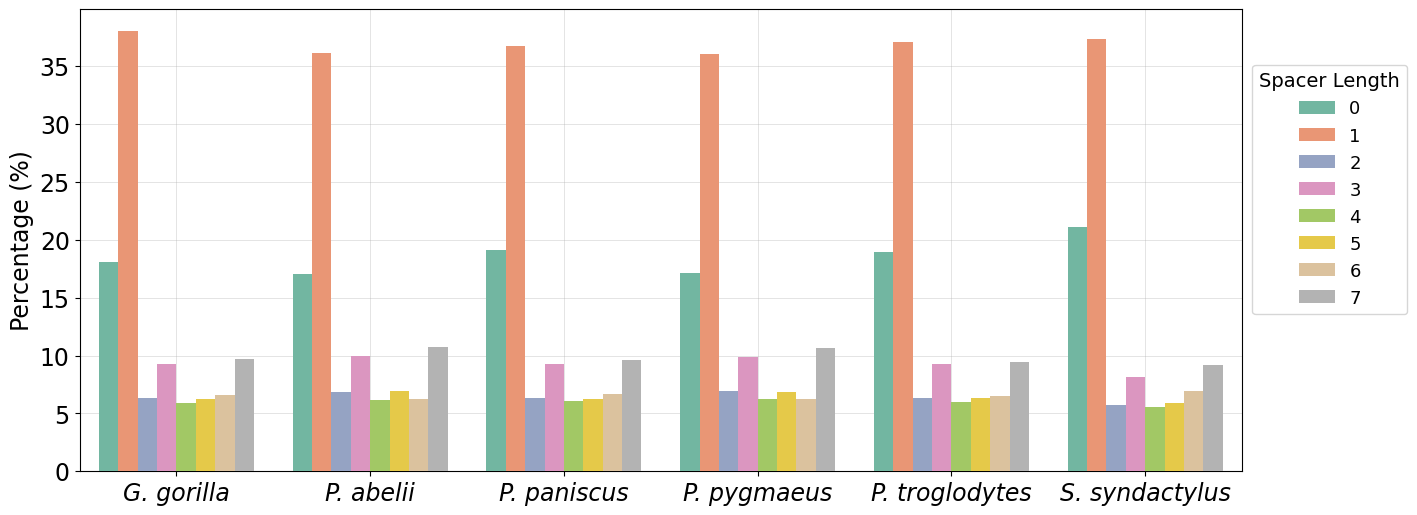

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.barplot(data=hdna_df_all,
            hue="Spacer Length",
            x="species",
            y="Percentage (%)",
            palette=sns.color_palette("Set2"),
            order=["G. gorilla", "P. abelii", "P. paniscus", "P. pygmaeus", "P. troglodytes", "S. syndactylus"],
            zorder=3,
            ax=ax,
           )
ax.tick_params(axis="both", labelsize=17)
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
# Set x-tick labels to italic
plt.xticks(fontstyle='italic')
ax.set_xlabel('')
ax.legend(loc=0, title="Spacer Length", title_fontsize=14, 
          prop={"size": 13}, bbox_to_anchor=(1.15, 0.9))

fig.savefig(f"{figures}/spacer_length_primates.png", bbox_inches='tight')

In [95]:
mirror_df_all = pd.concat([(1e2 * mirror_primates[species].spacerLength\
                                              .value_counts(normalize=True))\
                                              .reset_index()\
                                              .rename(columns={"spacerLength": "Spacer Length", 
                                                               "proportion": "Percentage (%)"})\
                                             .assign(species=primates[species]) for species in mirror_primates]).reset_index(drop=True)
mirror_df_all

,Spacer Length,Percentage (%),species
0,1,46.903032,G. gorilla
1,0,20.596504,G. gorilla
2,7,6.846905,G. gorilla
3,3,6.841469,G. gorilla
4,5,5.438276,G. gorilla
5,2,5.192570,G. gorilla
6,6,4.139965,G. gorilla
7,4,4.041278,G. gorilla
8,1,47.447227,P. paniscus
9,0,21.117745,P. paniscus


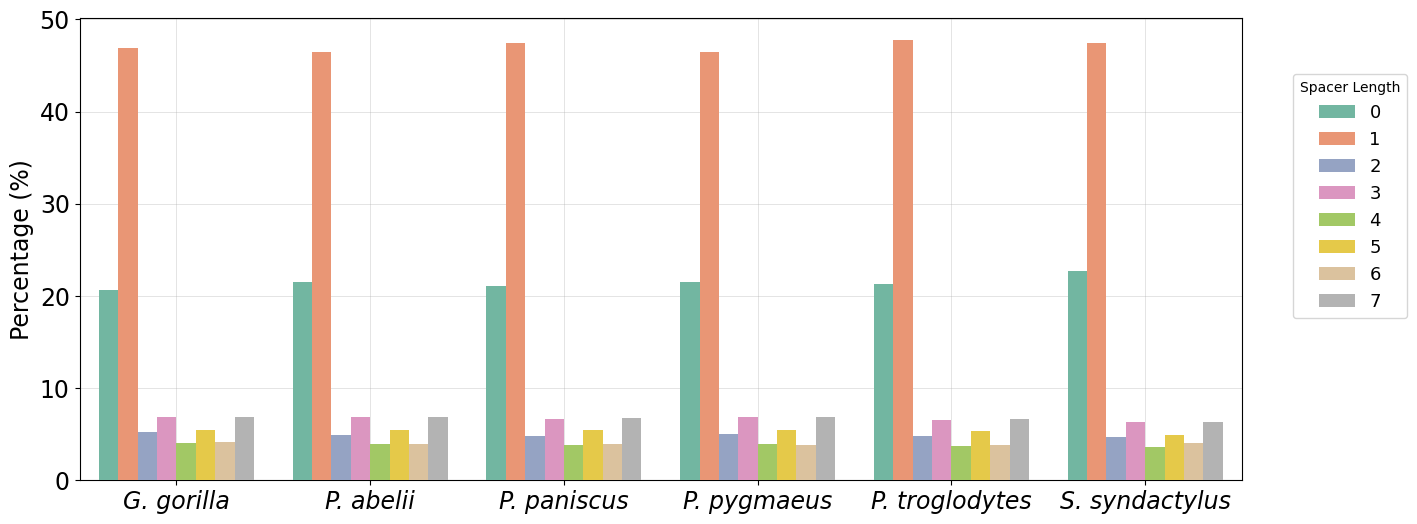

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.barplot(data=mirror_df_all,
            hue="Spacer Length",
            x="species",
            y="Percentage (%)",
            palette=sns.color_palette("Set2"),
            order=["G. gorilla", "P. abelii", "P. paniscus", "P. pygmaeus", "P. troglodytes", "S. syndactylus"],
            zorder=3,
            ax=ax,
           )
ax.tick_params(axis="both", labelsize=17)
ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
# Set x-tick labels to italic
plt.xticks(fontstyle='italic')
ax.set_xlabel('')
ax.legend(loc=0, 
          title="Spacer Length",
          prop={"size": 13}, bbox_to_anchor=(1.15, 0.9))

fig.savefig(f"{figures}/spacer_mirror_repeats_length_primates.png", bbox_inches='tight')

### Arm Length Primates

In [105]:
mirror_df_all = pd.concat([(1e2 * mirror_primates[species].query("armLength <= 30")\
                                              .armLength\
                                              .value_counts(normalize=True))\
                                              .reset_index()\
                                              .rename(columns={"spacerLength": "Spacer Length", 
                                                               "proportion": "Percentage (%)"})\
                                             .assign(species=primates[species]) for species in mirror_primates]).reset_index(drop=True)\
                                            .pivot(index="armLength", columns="species", values="Percentage (%)")\
                                            .fillna(0.0)[["G. gorilla", "S. syndactylus", "P. abelii", "P. pygmaeus", "P. paniscus", "P. troglodytes"]]

hdna_df_all = pd.concat([(1e2 * hdna_primates[species].query("armLength <= 30")\
                                              .armLength\
                                              .value_counts(normalize=True))\
                                              .reset_index()\
                                              .rename(columns={"spacerLength": "Spacer Length", 
                                                               "proportion": "Percentage (%)"})\
                                             .assign(species=primates[species]) for species in mirror_primates]).reset_index(drop=True)\
                                             .pivot(index="armLength", columns="species", values="Percentage (%)")\
                                            .fillna(0.0)[["G. gorilla", "S. syndactylus", "P. abelii", "P. pygmaeus", "P. paniscus", "P. troglodytes"]]
hdna_df_all

species,G. gorilla,S. syndactylus,P. abelii,P. pygmaeus,P. paniscus,P. troglodytes
armLength,,,,,,
10,26.362720,23.677316,26.917945,26.835033,27.702738,27.400967
11,18.953748,16.771485,19.118892,19.126023,19.084772,19.016194
12,11.779969,11.304136,12.067567,12.108115,11.946933,11.930586
13,9.741367,8.749987,10.376071,10.276543,9.494844,9.434831
14,6.495652,6.354206,7.054917,7.058410,6.692797,6.667469
15,5.355323,5.056353,5.544066,5.544960,5.644505,5.382959
16,3.596260,3.441513,3.680648,3.636741,3.562184,3.518339
17,2.890418,2.933724,3.128961,3.191986,2.858569,2.881448
18,2.099842,2.297721,2.363528,2.366304,2.200382,2.228072


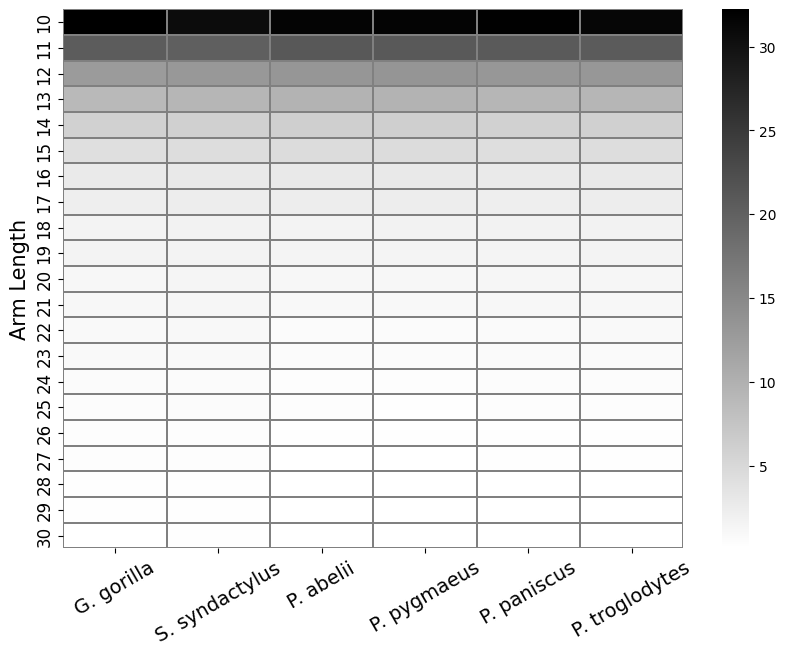

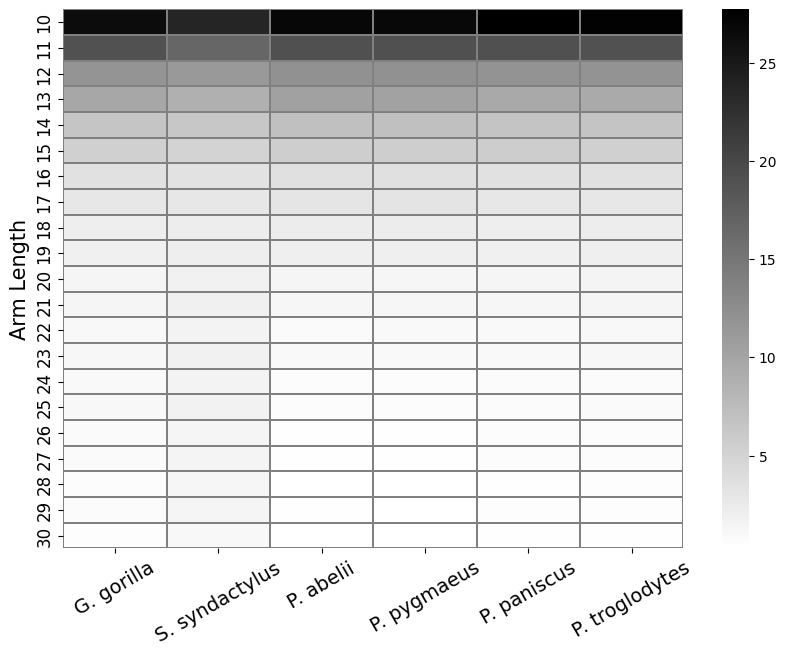

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.heatmap(data=mirror_df_all,
            cmap="binary",
            lw=0.2,
            linecolor='gray',
            # annot=True,
            # fmt=".2f",
            ax=ax
           )
ax.set_xlabel('')
ax.set_ylabel("Arm Length")
ax.tick_params(axis="both", labelsize=12)
ax.tick_params(axis="x", labelsize=14, rotation=30)
ax.yaxis.label.set_size(15)
fig.savefig(f"{figures}/heatmap_mirror_repeats_arm_length_primates.png", bbox_inches='tight')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.heatmap(data=hdna_df_all,
            cmap="binary",
            lw=0.2,
            linecolor='gray',
            # annot=True,
            # fmt=".2f",
            ax=ax
           )
ax.set_xlabel('')
ax.set_ylabel("Arm Length")
ax.tick_params(axis="both", labelsize=12)
ax.tick_params(axis="x", labelsize=14, rotation=30)
ax.yaxis.label.set_size(15)
fig.savefig(f"{figures}/heatmap_hdna_repeats_arm_length_primates.png", bbox_inches='tight')